# Use Micro-SAM for Cell Segmentation

To segment the full cell, including the cytosol, we use Micro-SAM to segment the cells.

We recommend to first finish the exercises `cell_classification/pytorch/train_infection_classifier` and `nucleus_segmentation/bioimageio/pretrained_segmentation` before working on this exercise.

In [ ]:
# General imports.
import os

import imageio.v3 as imageio
import napari

In [ ]:
# This function will download and unpack the data and do some further data preparation.
# It will only be executed if the data has not been downloaded yet.
data_dir = "../../data"
if os.path.exists(data_dir):
    print("The data is downloaded already.")
else:
    utils.prepare_data(data_dir)

### 1. Check the data

Let's first visualize the images for the segmentation task. Here, we will only use the serum channel and want to segment the individual cells based on it.

In [ ]:
# Load one of the images from the test dataset.
image_path = os.path.join(data_dir, "test/gt_image_041/gt_image_041_serum_image.tif")
image = imageio.imread(image_path)
label_path = os.path.join(data_dir, "test/gt_image_041/gt_image_041_cell_labels.tif")
label = imageio.imread(label_path)

In [ ]:
# Visualize it with napari
viewer = napari.Viewer()
viewer.add_image(image)
viewer.add_labels(label)
napari.run()

# 2. Launching Micro-SAM
Micro-SAM can be launched in three ways: 
 1. via the `Plugins` menu in napari choosing `Segment Anything for Microscopy`
 2. launching Micro-SAM with python command
 3. launching Micro-SAM via CLI (not covered in this notebook)

### 2.1 Embeddings
Before we can start segmenting with Micro-SAM we need to calculate `embeddings`. Embeddings capture the meaning or "essence" of the image.

Micro-SAM computes embeddings on the click of a button in the user interface (do this when you chose the first launch option).

If you chose option two or three then Micro-SAM will automatically compute embeddings when launched.

In [ ]:
from micro_sam.sam_annotator.annotator_2d import annotator_2d
# launch annotator_2d
viewer = annotator_2d(image=image)
napari.run()

# 3. Segmenting with Micro-SAM
Now that the embeddings are computed we can start segmenting. With a click on the button `Automatic Segmentation` Micro-SAM will segment the entire image.

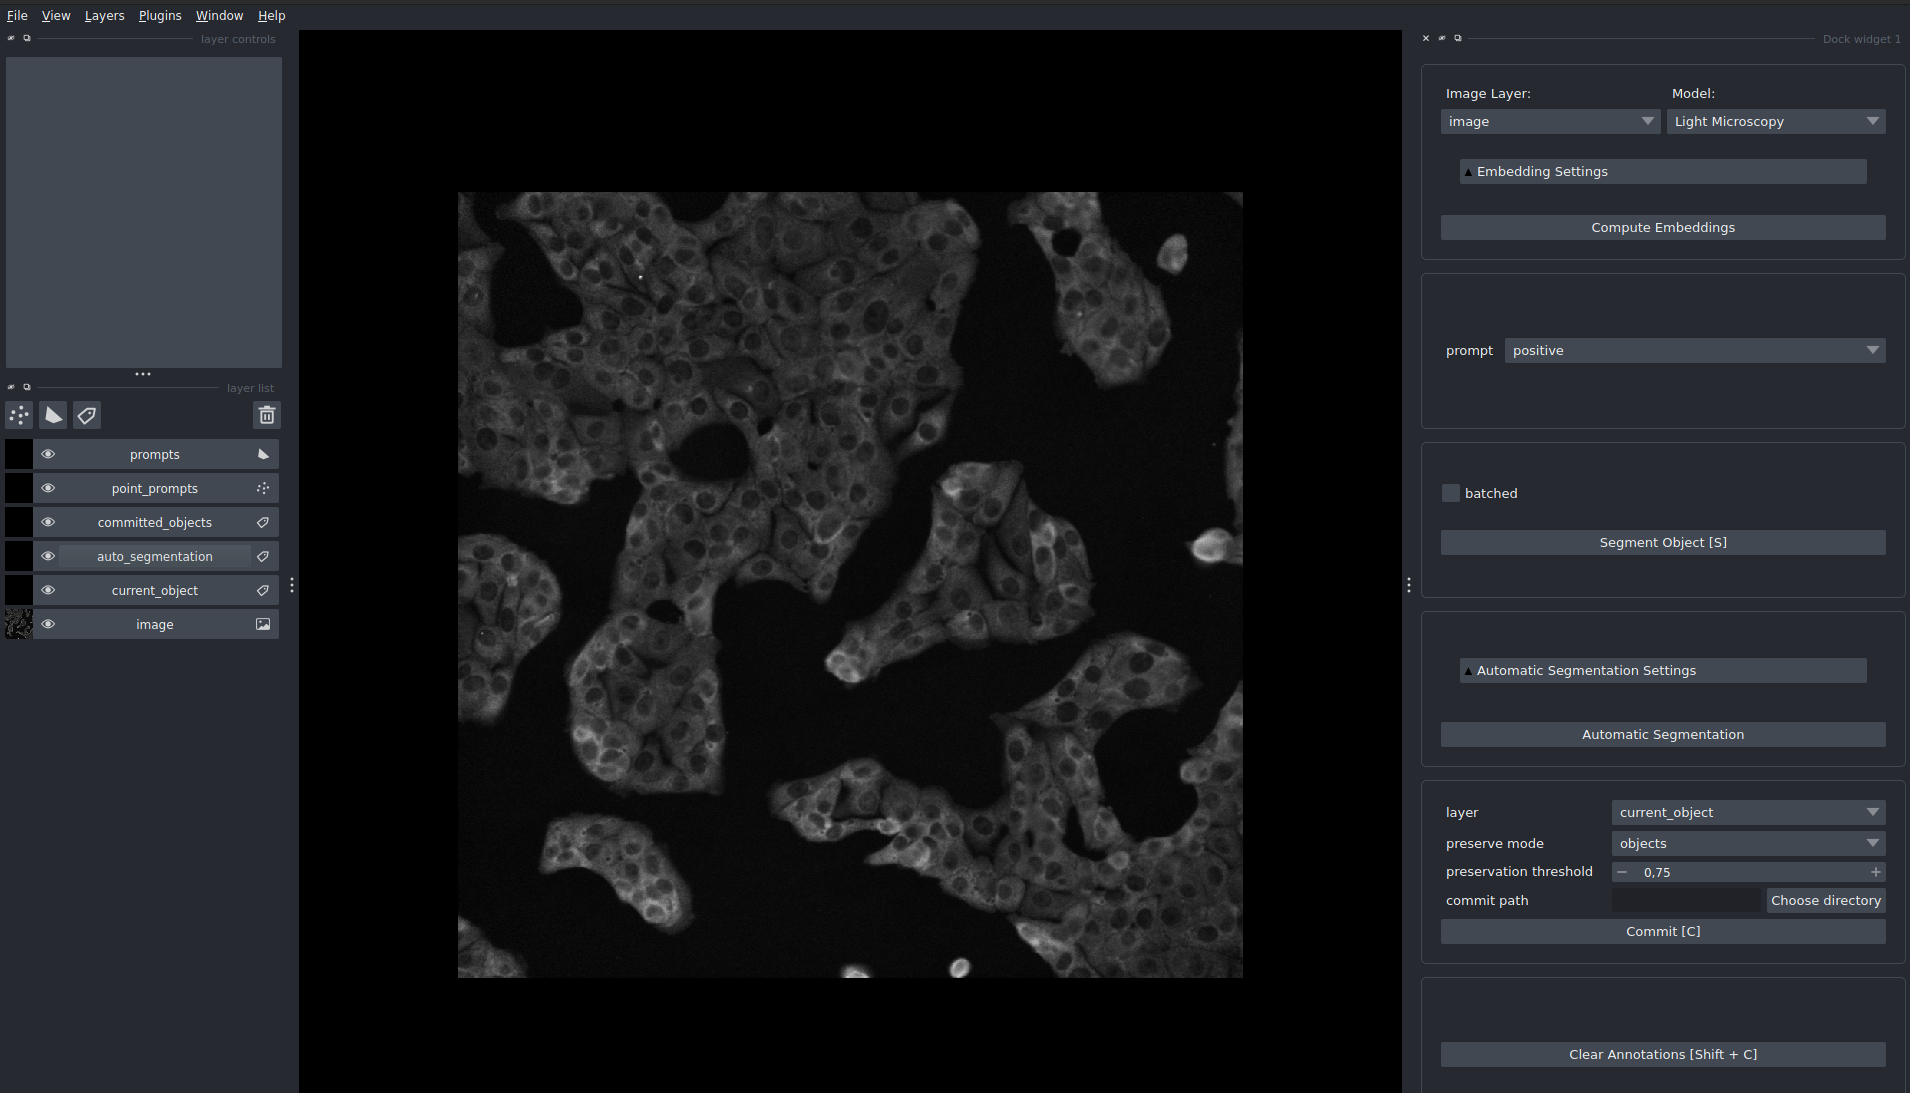

# 4. Additional Information
You can find detailed instruction how to setup and use Micro-SAM [here](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html).

There also is a `Quick Start` Video available [here](https://www.youtube.com/watch?v=gcv0fa84mCc&t=140s).